In [ ]:
pip install pycaret 

In [35]:
print(pycaret.__version__)

2.3.3


In [ ]:
pip install pandas 

In [4]:
import pandas as pd 
from pycaret.regression import *

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Pathao Assignment/selected_features.csv")
data.head()

,day_of_week,Hour,undiscounted_fare,rating,ride_duration,ride_distance,total_monthly_trips
0,2.0,8.0,132.0,4.0,1464.0,6775.0,102
1,1.0,10.0,78.0,5.0,419.0,3170.0,102
2,1.0,10.0,85.0,5.0,564.0,3655.0,102
3,2.0,19.0,93.0,5.0,922.0,4194.0,336
4,1.0,10.0,139.0,4.0,1113.0,7254.0,336


In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2)
print("Shape of train is :{} \nShape of test is :{}".format(train.shape, test.shape))

Shape of train is :(21217, 7) 
Shape of test is :(5305, 7)


In [7]:
# Pipeline setup 
set_pipeline = setup(train, target='total_monthly_trips')

,Description,Value
0,session_id,2232
1,Target,total_monthly_trips
2,Original Data,"(21217, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(14851, 6)"


In [8]:
# Creating models 
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,87.1784,12106.9644,109.9736,0.0051,0.8965,1.6854,1.036
lr,Linear Regression,87.3948,12142.9342,110.1381,0.0021,0.8998,1.7060,0.287
ridge,Ridge Regression,87.3948,12142.9337,110.1381,0.0021,0.8998,1.7060,0.016
en,Elastic Net,87.3937,12143.2049,110.1394,0.0021,0.8999,1.7070,0.021
lar,Least Angle Regression,87.3948,12142.9338,110.1381,0.0021,0.8998,1.7060,0.016
lasso,Lasso Regression,87.3961,12143.6799,110.1415,0.0020,0.8999,1.7069,0.021
br,Bayesian Ridge,87.3944,12144.1865,110.1441,0.0020,0.9000,1.7079,0.017
omp,Orthogonal Matching Pursuit,87.4524,12160.4050,110.2181,0.0006,0.9004,1.7099,0.016
llar,Lasso Least Angle Regression,87.5658,12177.2271,110.2959,-0.0008,0.9009,1.7104,0.015
lightgbm,Light Gradient Boosting Machine,87.7526,12303.8596,110.8589,-0.0109,0.8986,1.6820,0.161


In [9]:
# Creating Gradient Boosted Regression 
base_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,89.3634,12676.7788,112.5912,0.0140,0.9123,1.9305
1,87.4149,12508.4755,111.8413,-0.0012,0.8601,1.4344
2,88.6192,12437.6161,111.5241,0.0054,0.9114,1.7701
3,83.6570,10730.6530,103.5889,0.0089,0.8974,1.7136
4,83.3559,10922.7174,104.5118,0.0109,0.8831,1.7110
5,86.3143,11790.5902,108.5845,0.0111,0.8481,1.3295
6,85.6463,11625.3859,107.8211,-0.0015,0.8915,1.6766
7,90.4377,13223.5441,114.9937,-0.0030,0.9176,1.6856
8,89.9553,12859.4878,113.3997,0.0103,0.9437,1.7954
9,87.0197,12294.3951,110.8801,-0.0041,0.9000,1.8074


In [10]:
# Base model tuning 
tune_base_model = tune_model(base_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,89.5377,12718.1626,112.7748,0.0108,0.9147,1.9317
1,87.4059,12426.0262,111.4721,0.0054,0.8613,1.4503
2,88.5850,12420.3941,111.4468,0.0067,0.9124,1.7745
3,83.8206,10757.9117,103.7204,0.0064,0.8991,1.7147
4,83.7663,10987.5141,104.8213,0.0050,0.8867,1.7441
5,86.5158,11816.8581,108.7054,0.0089,0.8497,1.3389
6,85.5798,11519.3297,107.3281,0.0077,0.8919,1.6964
7,89.7617,13171.2774,114.7662,0.0010,0.9185,1.7023
8,90.4454,12867.9674,113.4371,0.0096,0.9473,1.8160
9,86.7481,12171.4594,110.3243,0.0060,0.8988,1.8041


In [11]:
# Details of the base model 
tune_base_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.005, loss='ls',
                          max_depth=2, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.2, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2232, subsample=0.55, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

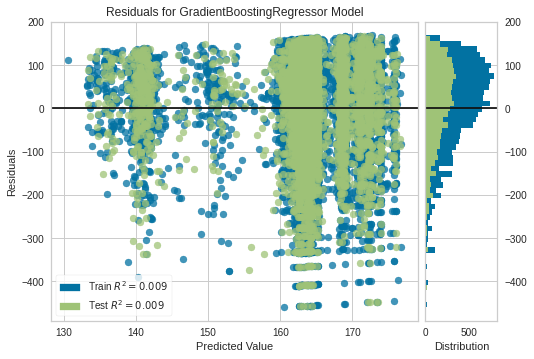

In [12]:
# Residuals of the models 
plot_model(tune_base_model, plot='residuals')

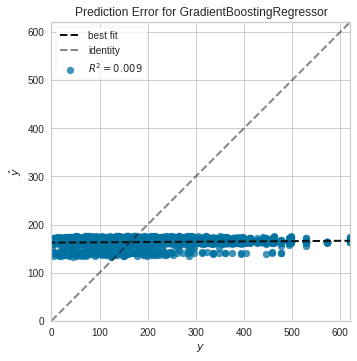

In [13]:
# Errors of the models 
plot_model(tune_base_model, plot = 'error')

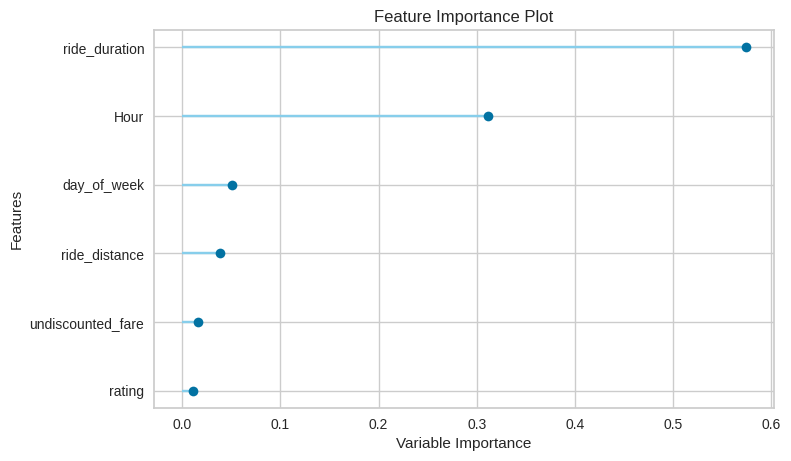

In [15]:
# Feature importtance of the models 
plot_model(tune_base_model, plot = 'feature')

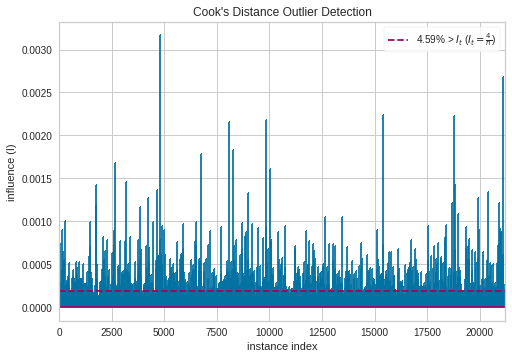

In [16]:
# Cooks Distance Plot 
plot_model(tune_base_model, plot='cooks')

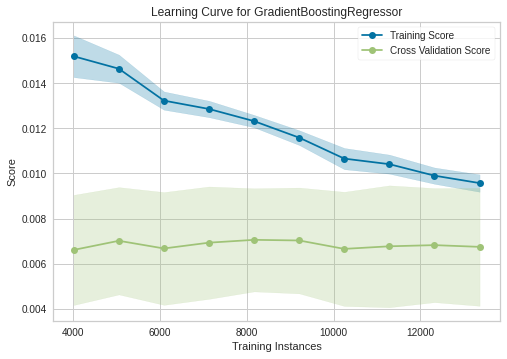

In [17]:
# Learning Curve
plot_model(tune_base_model, plot='learning')

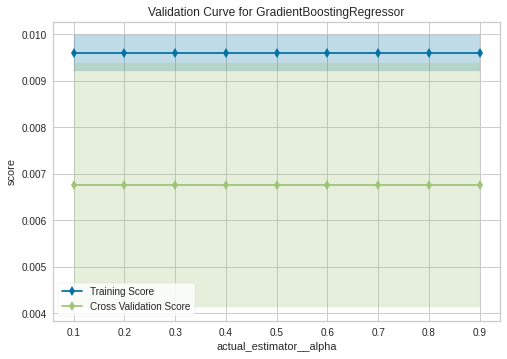

In [18]:
# Validation Curve 
plot_model(tune_base_model, plot='vc')

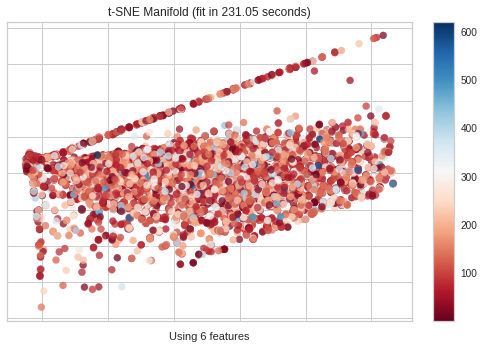

In [19]:
# Manifold Learning
plot_model(tune_base_model, plot='manifold')

In [20]:
# Evaluation of the models 
evaluate_model(tune_base_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Predict with test data

In [22]:
# Finalizing models 
finalize = finalize_model(tune_base_model)
print(finalize)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.005, loss='ls',
                          max_depth=2, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.2, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2232, subsample=0.55, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [23]:
# Predicting with the test dataset 
unseen_predictions = predict_model(tune_base_model, data=test)
unseen_predictions.head()

,day_of_week,Hour,undiscounted_fare,rating,ride_duration,ride_distance,total_monthly_trips,Label
14783,2.0,13.0,134.0,5.0,1113.0,6912.0,59,164.067885
11958,2.0,12.0,148.0,4.0,1385.0,7863.0,299,163.861411
15934,5.0,5.0,52.0,4.0,254.0,1450.0,413,171.396812
17502,1.0,21.0,90.0,5.0,711.0,3462.0,89,162.609169
19332,5.0,18.0,62.0,4.0,445.0,2147.0,163,162.698122


### Full Form of the Models

In [24]:
# Full forms of the models 
model_metadata = models() 
model_metadata['Name']

ID
lr                          Linear Regression
lasso                        Lasso Regression
ridge                        Ridge Regression
en                                Elastic Net
lar                    Least Angle Regression
llar             Lasso Least Angle Regression
omp               Orthogonal Matching Pursuit
br                             Bayesian Ridge
ard         Automatic Relevance Determination
par              Passive Aggressive Regressor
ransac                Random Sample Consensus
tr                         TheilSen Regressor
huber                         Huber Regressor
kr                               Kernel Ridge
svm                 Support Vector Regression
knn                     K Neighbors Regressor
dt                    Decision Tree Regressor
rf                    Random Forest Regressor
et                      Extra Trees Regressor
ada                        AdaBoost Regressor
gbr               Gradient Boosting Regressor
mlp                            

### Blending Models

In [25]:
# Five best models 
gbr = create_model('gbr')
lr = create_model('lr') 
ridge = create_model('ridge')
en = create_model('en')
lar = create_model('lar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,89.6612,12787.5574,113.0821,0.0054,0.9166,1.9554
1,87.7808,12505.7588,111.8292,-0.0010,0.8636,1.4584
2,88.7042,12471.5587,111.6761,0.0026,0.9134,1.7745
3,83.9721,10803.7955,103.9413,0.0022,0.9008,1.7201
4,83.8688,11007.5407,104.9168,0.0032,0.8880,1.7497
5,86.6573,11869.0074,108.9450,0.0045,0.8521,1.3482
6,85.7252,11573.4324,107.5799,0.0030,0.8935,1.7061
7,89.8186,13238.1501,115.0572,-0.0041,0.9193,1.7050
8,90.7866,12955.0512,113.8203,0.0029,0.9504,1.8276
9,86.9736,12217.4856,110.5327,0.0022,0.9003,1.8156


In [26]:
gbr_tune = tune_model(gbr, fold=5) 
lr_tune = tune_model(lr, fold=5) 
ridge_tune = tune_model(ridge, fold=5) 
en_tune = tune_model(en, fold=5) 
lar_tune = tune_model(lar, fold=5) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,88.6948,12644.6514,112.4484,0.0028,0.8901,1.7042
1,86.3441,11634.6997,107.8643,0.0035,0.9073,1.7487
2,85.3222,11441.3212,106.9641,0.0044,0.8708,1.5512
3,87.7527,12406.1594,111.3829,-0.0003,0.9062,1.7039
4,88.8344,12579.6974,112.1593,0.0031,0.9254,1.8199
Mean,87.3896,12141.3058,110.1638,0.0027,0.9000,1.7056
SD,1.3631,502.4579,2.2897,0.0016,0.0184,0.0881


In [28]:
blend_specific = blend_models(estimator_list = [gbr_tune, lr_tune, ridge_tune, en_tune, lar_tune])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,89.6224,12768.3729,112.9972,0.0069,0.9163,1.9513
1,87.6649,12480.2975,111.7153,0.0011,0.8630,1.4567
2,88.6613,12455.3896,111.6037,0.0039,0.9131,1.7747
3,83.9089,10788.4043,103.8672,0.0036,0.9004,1.7192
4,83.8289,10997.4683,104.8688,0.0041,0.8877,1.7488
5,86.5993,11851.4806,108.8645,0.0060,0.8515,1.3463
6,85.6810,11556.2467,107.5000,0.0045,0.8932,1.7051
7,89.7763,13217.5631,114.9677,-0.0025,0.9190,1.7044
8,90.6961,12929.0843,113.7061,0.0049,0.9497,1.8251
9,86.9179,12205.1766,110.4770,0.0032,0.9001,1.8136


In [29]:
finalize_blend = finalize_model(blend_specific)
unseen_predictions = predict_model(finalize_blend, data=test, round=0)
unseen_predictions.head() 

,day_of_week,Hour,undiscounted_fare,rating,ride_duration,ride_distance,total_monthly_trips,Label
14783,2.0,13.0,134.0,5.0,1113.0,6912.0,59,164.559326
11958,2.0,12.0,148.0,4.0,1385.0,7863.0,299,167.356545
15934,5.0,5.0,52.0,4.0,254.0,1450.0,413,171.200630
17502,1.0,21.0,90.0,5.0,711.0,3462.0,89,152.937567
19332,5.0,18.0,62.0,4.0,445.0,2147.0,163,159.664222


### Stacking Models

In [30]:
# Five best models 
gbr = create_model('gbr')
lr = create_model('lr') 
ridge = create_model('ridge')
en = create_model('en') 
lar = create_model('lar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,89.6612,12787.5574,113.0821,0.0054,0.9166,1.9554
1,87.7808,12505.7588,111.8292,-0.0010,0.8636,1.4584
2,88.7042,12471.5587,111.6761,0.0026,0.9134,1.7745
3,83.9721,10803.7955,103.9413,0.0022,0.9008,1.7201
4,83.8688,11007.5407,104.9168,0.0032,0.8880,1.7497
5,86.6573,11869.0074,108.9450,0.0045,0.8521,1.3482
6,85.7252,11573.4324,107.5799,0.0030,0.8935,1.7061
7,89.8186,13238.1501,115.0572,-0.0041,0.9193,1.7050
8,90.7866,12955.0512,113.8203,0.0029,0.9504,1.8276
9,86.9736,12217.4856,110.5327,0.0022,0.9003,1.8156


In [31]:
gbr_tune = tune_model(gbr, fold=5) 
lr_tune = tune_model(lr, fold=5) 
ridge_tune = tune_model(ridge, fold=5) 
en_tune = tune_model(en, fold=5) 
lar_tune = tune_model(lar, fold=5) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,88.6948,12644.6514,112.4484,0.0028,0.8901,1.7042
1,86.3441,11634.6997,107.8643,0.0035,0.9073,1.7487
2,85.3222,11441.3212,106.9641,0.0044,0.8708,1.5512
3,87.7527,12406.1594,111.3829,-0.0003,0.9062,1.7039
4,88.8344,12579.6974,112.1593,0.0031,0.9254,1.8199
Mean,87.3896,12141.3058,110.1638,0.0027,0.9000,1.7056
SD,1.3631,502.4579,2.2897,0.0016,0.0184,0.0881


In [32]:
stack_1 = stack_models(estimator_list=[gbr_tune, lr_tune, ridge_tune, en_tune, lar_tune]) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,89.3473,12669.2514,112.5578,0.0146,0.9121,1.9084
1,87.4704,12448.8128,111.5742,0.0036,0.8608,1.4431
2,88.4662,12388.5258,111.3038,0.0093,0.9111,1.7692
3,83.7268,10734.7573,103.6087,0.0085,0.8975,1.7023
4,83.5324,10966.7043,104.7220,0.0069,0.8843,1.7305
5,86.4613,11787.5223,108.5704,0.0114,0.8480,1.3295
6,85.3853,11504.2160,107.2577,0.0090,0.8904,1.6831
7,90.1298,13224.6549,114.9985,-0.0031,0.9200,1.7020
8,90.1584,12837.1083,113.3010,0.0120,0.9445,1.8037
9,86.6371,12134.0669,110.1547,0.0090,0.8967,1.7953


In [33]:
finalize_stack = finalize_model(stack_1)
unseen_predictions = predict_model(finalize_stack, data=test, round=0)
unseen_predictions.head() 

,day_of_week,Hour,undiscounted_fare,rating,ride_duration,ride_distance,total_monthly_trips,Label
14783,2.0,13.0,134.0,5.0,1113.0,6912.0,59,163.090002
11958,2.0,12.0,148.0,4.0,1385.0,7863.0,299,163.016156
15934,5.0,5.0,52.0,4.0,254.0,1450.0,413,182.833138
17502,1.0,21.0,90.0,5.0,711.0,3462.0,89,159.136899
19332,5.0,18.0,62.0,4.0,445.0,2147.0,163,163.926047
